In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r"E:\data science course\srk videos\datasets\SMSSpamCollection",sep = '\t',names = ['label','message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.dtypes

label      object
message    object
dtype: object

In [5]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

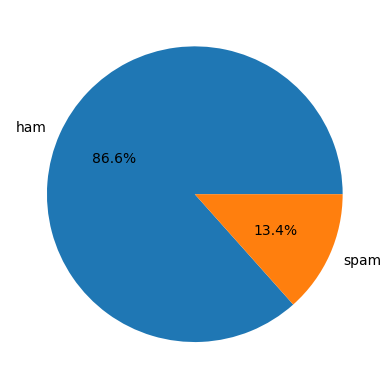

In [6]:
plt.pie(df['label'].value_counts(),labels = ['ham','spam'],autopct = '%.1f%%')
plt.show()

# Text preprocessing
- tokenization - removing the spaces
- stop words - removing the stop words
- stemming or lemmatization

In [7]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()

In [9]:
corpus = []
for i in range(len(df)):
    l = re.sub('[^a-zA-Z]',' ',df['message'][i])                                          # other than space and those letter removes all
    l = l.lower()                                                                         # make sentences to lower case
    l = l.split()                                                                         # make the sentences into words
    l = [ps.stem(word) for word in l if  word not in set(stopwords.words('english'))]
    l = ' '.join(l)                                                                       # attach the words and forms sentence
l

'rofl true name'

# Vectorization
- converting the text to numerical (in text data)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = pd.DataFrame(cv.fit_transform(corpus).toarray())

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
X.head()

In [ ]:
y = pd.get_dummies(df.label,drop_first = True).astype('int')

In [ ]:
y.head()

# X & y

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# Modelling

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

# prediction

In [ ]:
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

# Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
print('train:',accuracy_score(y_train,ypred_train))
print('test:',accuracy_score(y_test,ypred_test))